# About the Data
Dataset contain the sales data of different products in India.This data has been taken from the Kaggle dataset. Dataset contain informations regarding the age, state, product, occupation, marital_status, amount of purchase, product_id, customer name and Number of orders per userId.

This analysis will be a exploratory data analysis and we will try to figure out some important insights from the data in order to make a data driven decision.

### Data
This dataset is taken from kaggle open source data <"/kaggle/input/diwali-sales-dataset/Diwali Sales Data.csv">.

### Data crediblity and integrity
Dataset contain 11,251 rows and 15 columns. This is a big data but we can not generalize the concept for whole population but will try to figure out some strong insights that could help the users of this report to increase their sales.

## Import Libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('diwali_sales.csv', encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,AndhraÃÂ Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

This dataset contains 11251 rows and 15 columns


## Check the data info for any duplicate or null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [7]:
df.duplicated().sum()

8

## Data Cleaning

In [8]:
# Drop blank columns

df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(11243, 13)

**We can check that the number of rows has been decreased from 11251 to 11243. This shows tha the duplicate values have been terminated.**

In [11]:
# check for null values

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# Drop null values

df.dropna(inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11231 non-null  int64  
 1   Cust_name         11231 non-null  object 
 2   Product_ID        11231 non-null  object 
 3   Gender            11231 non-null  object 
 4   Age Group         11231 non-null  object 
 5   Age               11231 non-null  int64  
 6   Marital_Status    11231 non-null  int64  
 7   State             11231 non-null  object 
 8   Zone              11231 non-null  object 
 9   Occupation        11231 non-null  object 
 10  Product_Category  11231 non-null  object 
 11  Orders            11231 non-null  int64  
 12  Amount            11231 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


## Data cleaning steps
To get some better view while analyzing and ploting the data let's just clean the data as per our need and more appealing.
We will change the data type of Amount and marital_status from float and object to integer.
Will also change the Marital staus values from 0, 1 to unmarried and married.
Will change the gender values from F and M to Female and Male.

In [14]:
# Change the data type of Amount and Marital_Status

df['Amount'] = df['Amount'].astype('int')

df['Marital_Status'] = df['Marital_Status'].astype('int')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  int32 
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int32 
dtypes: int32(2), int64(3), object(8)
memory usage: 1.1+ MB


In [16]:
#Convert the column into a dataframe so that we could change the values 0,1 with Unmarried and married

df = pd.DataFrame(df)

#Change the Marital status values from 0, 1 to unmarried and married.

df['Marital_Status'] = df['Marital_Status'].replace({0: "Unmarried", 1: "Married"})

In [17]:
#Change the gender values from F and M to Female and Male.

df['Gender'] = df['Gender'].replace({"F": "Female", "M": "Male"})

In [18]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,Married,AndhraÃÂ Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877


**Check for the some important statistical insights of the data including the mean, standard deviation and count of values**

In [19]:
df[['Age', 'Amount','Orders']].describe()

,Age,Amount,Orders
count,11231.000000,11231.000000,11231.000000
mean,35.411985,9454.084676,2.489093
std,12.756116,5221.728074,1.114880
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12677.500000,3.000000
max,92.000000,23952.000000,4.000000


# Exploratory Data Analysis(EDA)

### Gender

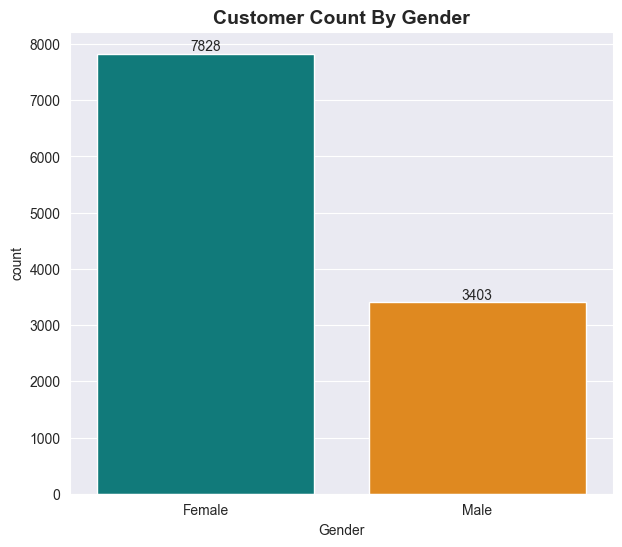

In [20]:
plt.figure(figsize=(7, 6))

colors = ["#008B8B", "#FF8C00"]

sns.set_style("darkgrid")

ax = sns.countplot(x = 'Gender', data = df, palette = colors)
plt.title("Customer Count By Gender" , fontsize = 14, fontweight='bold')

for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

,Gender,Amount
0,Female,74307679
1,Male,31871146


Text(0.5, 1.0, 'Sales Amount By Gender')

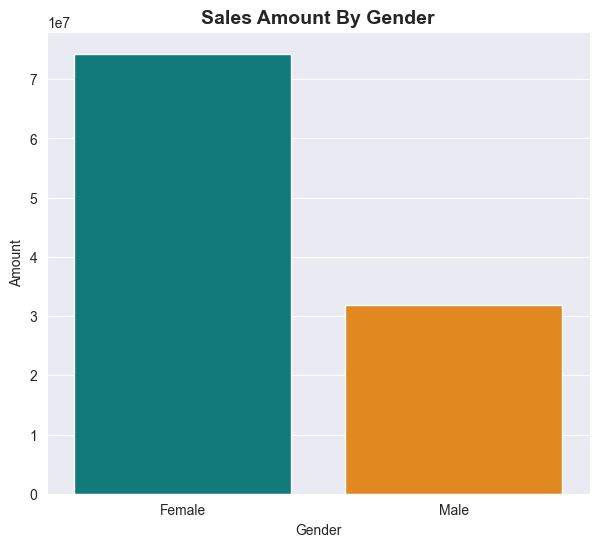

In [22]:
plt.figure(figsize=(7, 6))

colors = ["#008B8B", "#FF8C00"]

sns.set_style("darkgrid")

sales_gen = df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)
sns.barplot(x = 'Gender', y = "Amount", data = sales_gen, palette = colors)
plt.title("Sales Amount By Gender" , fontsize = 14, fontweight='bold')

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

### Age

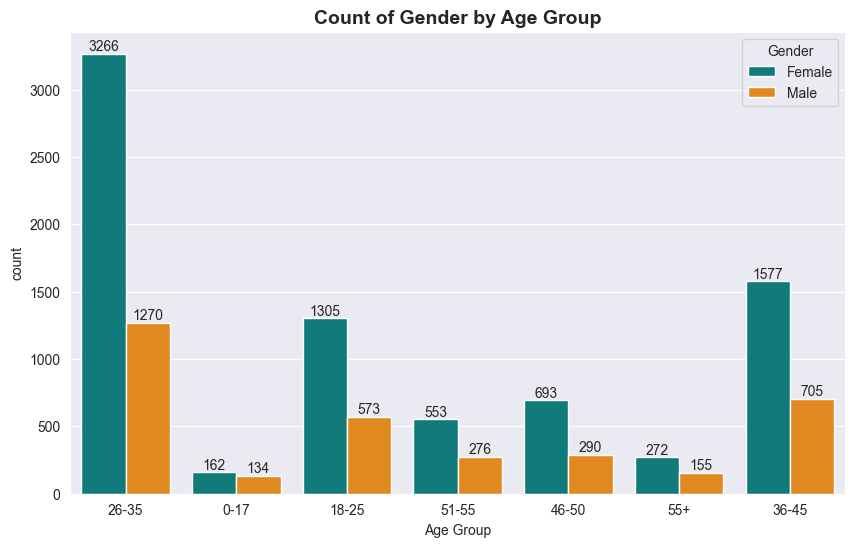

In [23]:
plt.figure(figsize=(10, 6))

colors = ["#008B8B", "#FF8C00"]

sns.set_style("darkgrid")

ax = sns.countplot(data = df, x = "Age Group", hue = "Gender", palette = colors)
plt.title("Count of Gender by Age Group", fontsize = 14, fontweight='bold')

for bars in ax.containers:
    ax.bar_label(bars)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs Female

In [24]:
grouped_df = df.groupby("Age Group")

In [33]:
sum_of_revenue = grouped_df["Amount"].sum()

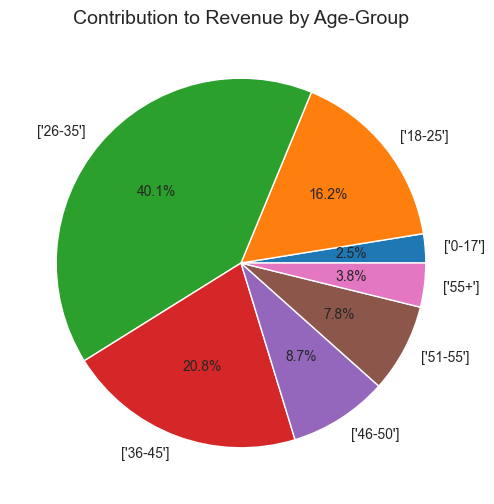

In [34]:
plt.figure(figsize=(12, 6))
plt.pie(sum_of_revenue, labels = grouped_df["Age Group"].unique(), autopct="%1.1f%%")
plt.title("Contribution to Revenue by Age-Group" , fontsize = 14)
plt.show()

### State

**We will analyze the data to get the top 10 States that have highest sales**

In [35]:
grouped_state = df.groupby("State").sum("Amount")
print(grouped_state)

                      User_ID    Age  Orders    Amount
State                                                 
AndhraÃÂ Pradesh   813444768  28862    2051   8037146
Bihar               434276128  15388    1058   4014669
Delhi              1107443106  39245    2740  11603818
Gujarat             427277619  15446    1063   3938159
Haryana             452368496  15830    1106   4217871
Himachal Pradesh    609750920  21618    1568   4963368
Jharkhand           381174335  13564     953   3026456
Karnataka          1307886059  46006    3240  13523540
Kerala              454335141  15625    1137   3894491
Madhya Pradesh      923841712  32991    2252   8101142
Maharashtra        1526613269  52624    3798  14404467
Punjab              200583317   6906     495   1525800
Rajasthan           231693815   7971     555   1909409
Telangana           125361330   4710     312   1151490
Uttar Pradesh      1947736750  69108    4803  19346055
Uttarakhand         320951452  11818     824   2520944


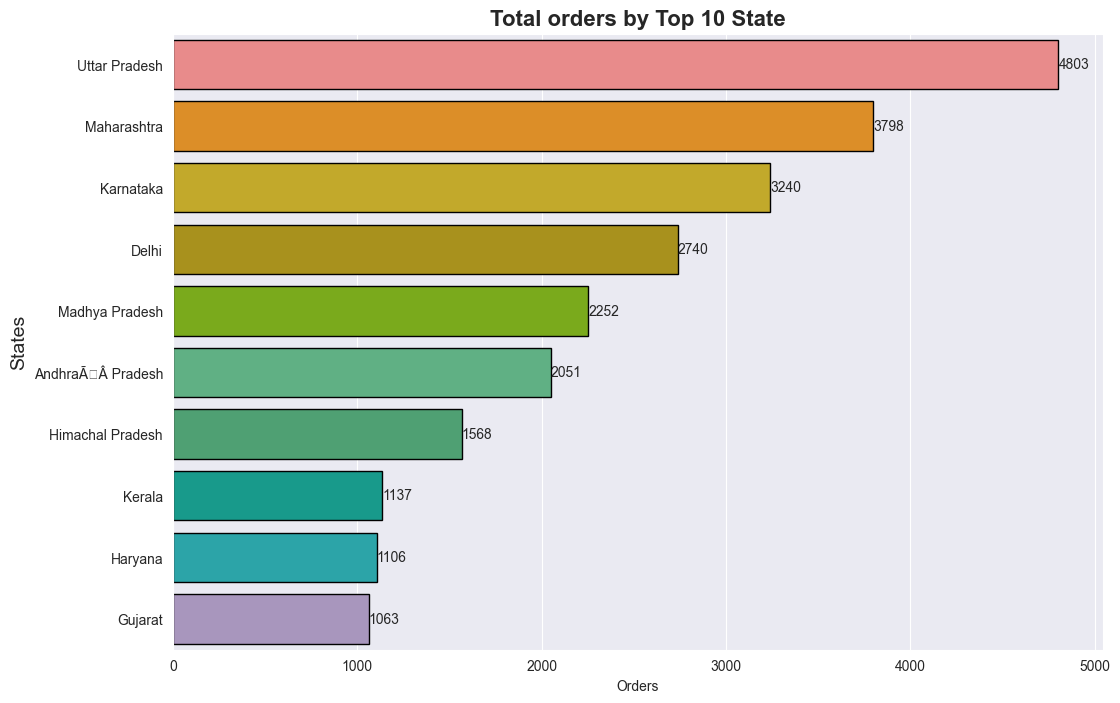

In [44]:
total_order_state = df.groupby(['State'], as_index =False).sum('Orders').sort_values(by='Orders', ascending = False).head(10)

colors = ["#f77c7c", "#fa920a", "#dbba12","#bfa006", "#82c204", "#53bd83", "#42ad72", "#02b09c", "#17b7bd", "#a78fc4"]

plt.figure(figsize=(12, 8))
states_plot = sns.barplot(x = 'Orders', y = 'State', data = total_order_state, palette = colors, edgecolor="black" )
plt.title("Total orders by Top 10 State", fontsize=16, fontweight='bold')
plt.ylabel("States", fontsize=14)

for bars in states_plot.containers:
    states_plot.bar_label(bars)

Text(0, 0.5, 'Amount')

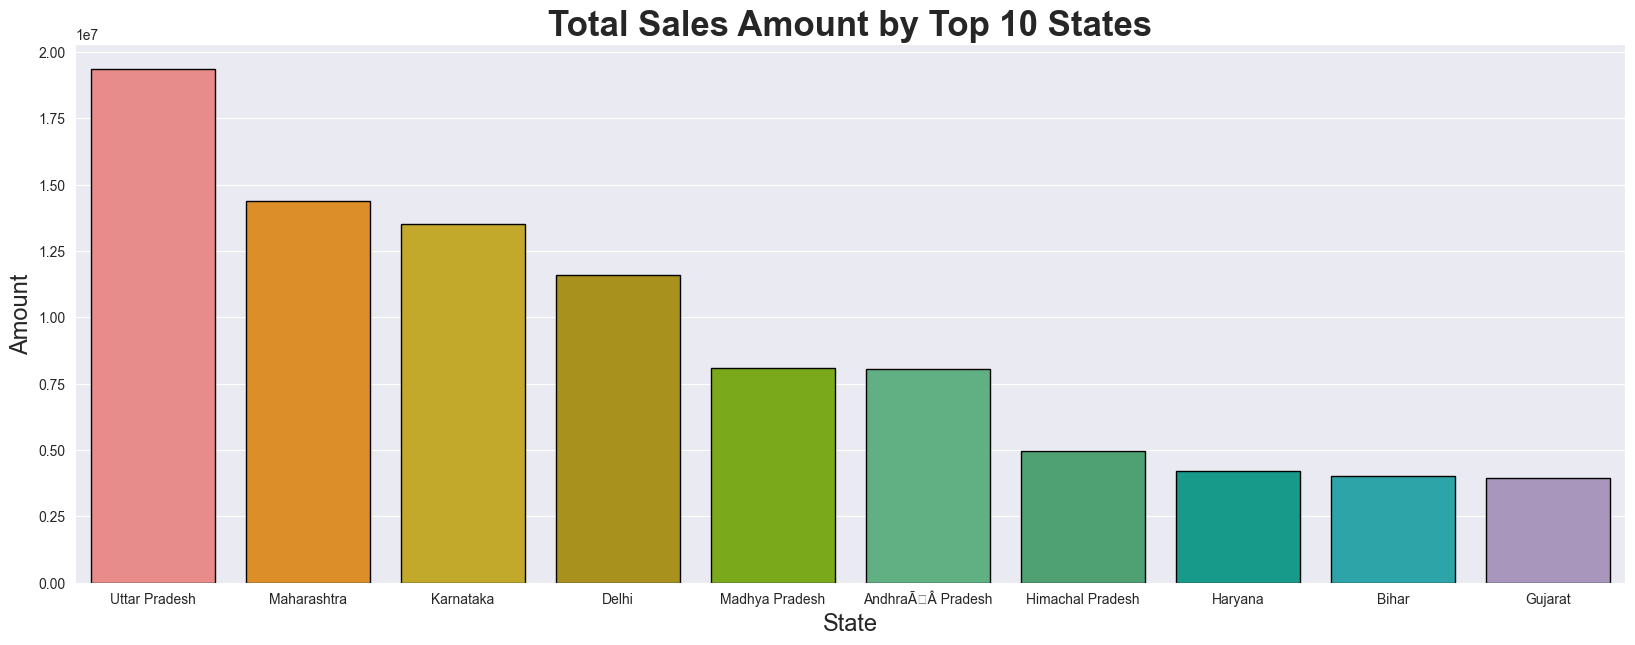

In [41]:
# Total Amount/Sales from top 10 states

plt.figure(figsize=(20, 7))

colors = ["#f77c7c", "#fa920a", "#dbba12","#bfa006", "#82c204", "#53bd83", "#42ad72", "#02b09c", "#17b7bd", "#a78fc4"]

sales_state = df.groupby(["State"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)
sns.barplot(data = sales_state, x = "State", y = "Amount", palette = colors, edgecolor="black" )

plt.title("Total Sales Amount by Top 10 States", fontsize=25, fontweight='bold')
plt.xlabel("State", fontsize=17)
plt.ylabel("Amount", fontsize=17)

*From above we can see that most of the orders and total sales/amount are from uttar Pradesh, Maharashtra and karnataka respecively*.

### Marital Status

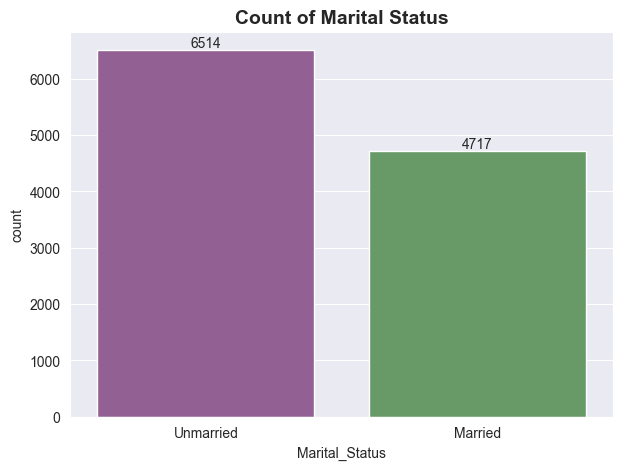

In [27]:
plt.figure(figsize=(7, 5))

colors = ["#9c579c", "#5fa35d"]

sns.set_style("darkgrid")

ax = sns.countplot(data = df, x = "Marital_Status", palette = colors)
plt.title("Count of Marital Status", fontsize = 14, fontweight = "bold")


for bars in ax.containers:
    ax.bar_label(bars)

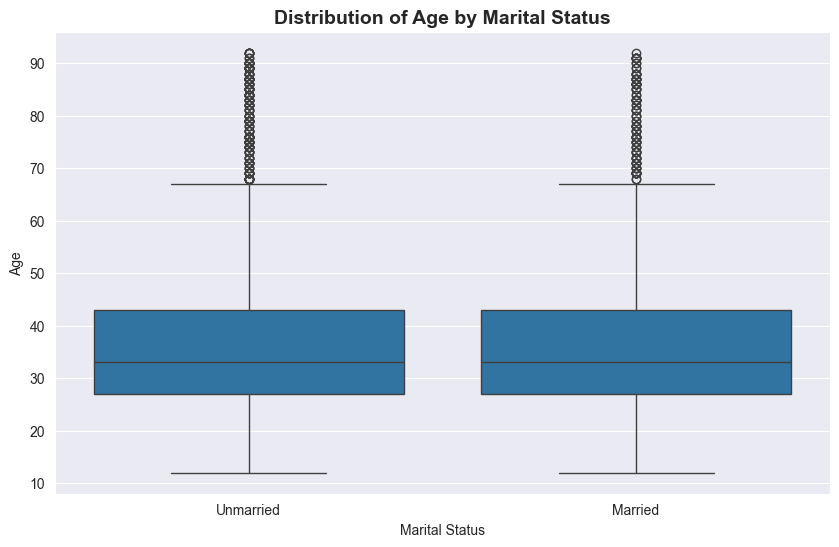

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marital_Status', y='Age')
plt.title('Distribution of Age by Marital Status',fontsize = 14, fontweight = "bold")
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Total Sales Amount by Marital Status')

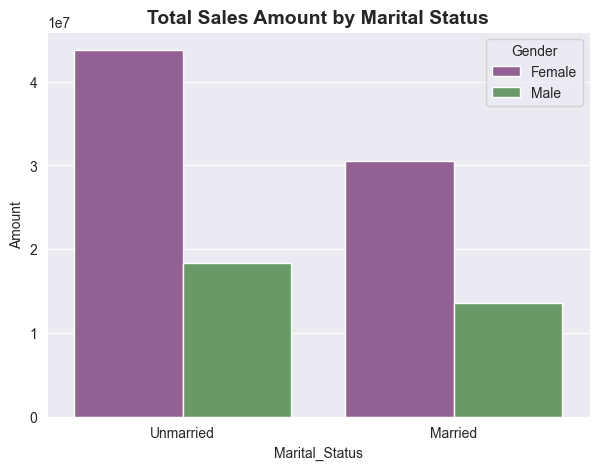

In [28]:
plt.figure(figsize=(7, 5))

colors = ["#9c579c", "#5fa35d"]

sales_state = df.groupby(["Marital_Status", "Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(data = sales_state, x = "Marital_Status", y = "Amount", hue = "Gender", palette = colors)
plt.title("Total Sales Amount by Marital Status", fontsize = 14, fontweight = "bold" )

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

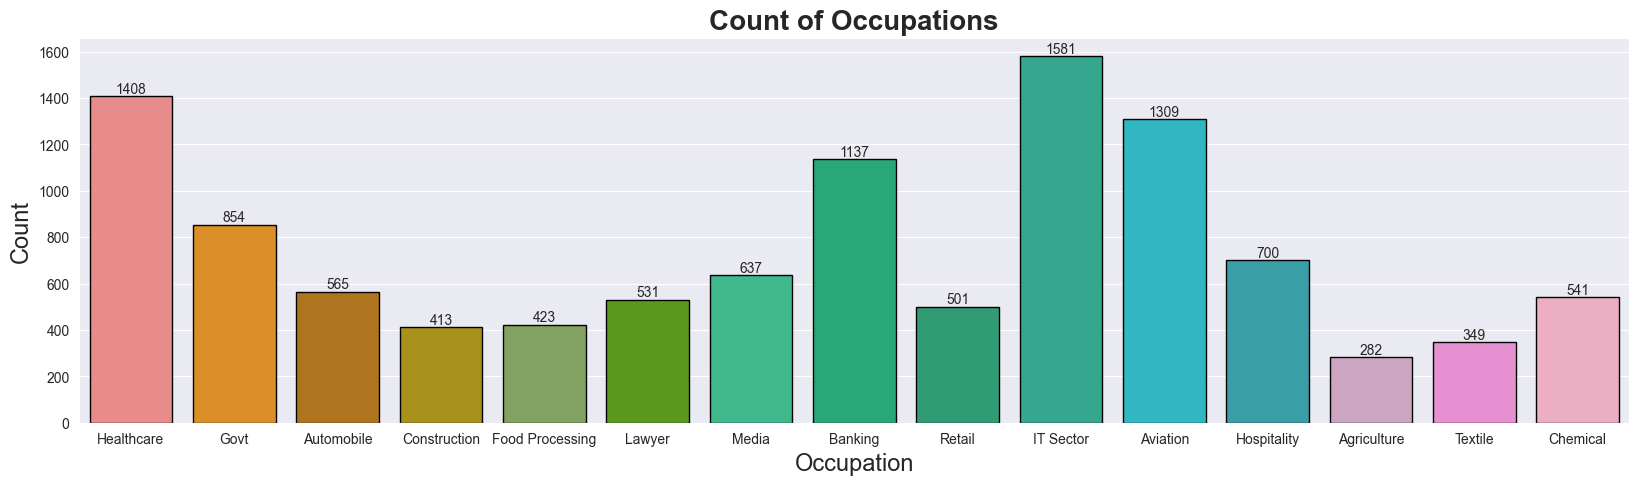

In [42]:
plt.figure(figsize=(20,5))

colors = ["#f77c7c", "#fa920a", "#c77a06", "#bfa006", "#82ad57", "#5bad09", "#2bcc91", "#13bd7e", "#1fad79", "#22ba99", "#18ccd9", "#28aeb8", "#d19fc5", "#f582d8","#f5a4c0", "#e87ba1"]

ax = sns.countplot(data = df, x = "Occupation", palette = colors, edgecolor="black")
plt.title("Count of Occupations", fontsize = 20, fontweight = "bold")
plt.xlabel("Occupation", fontsize=17)
plt.ylabel("Count", fontsize=17)

for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation Sector*.

### Product Category

In order to see the sales of each category product we will use the data and check for the categories of product which has highest sales and which are contributing most to the total sales.

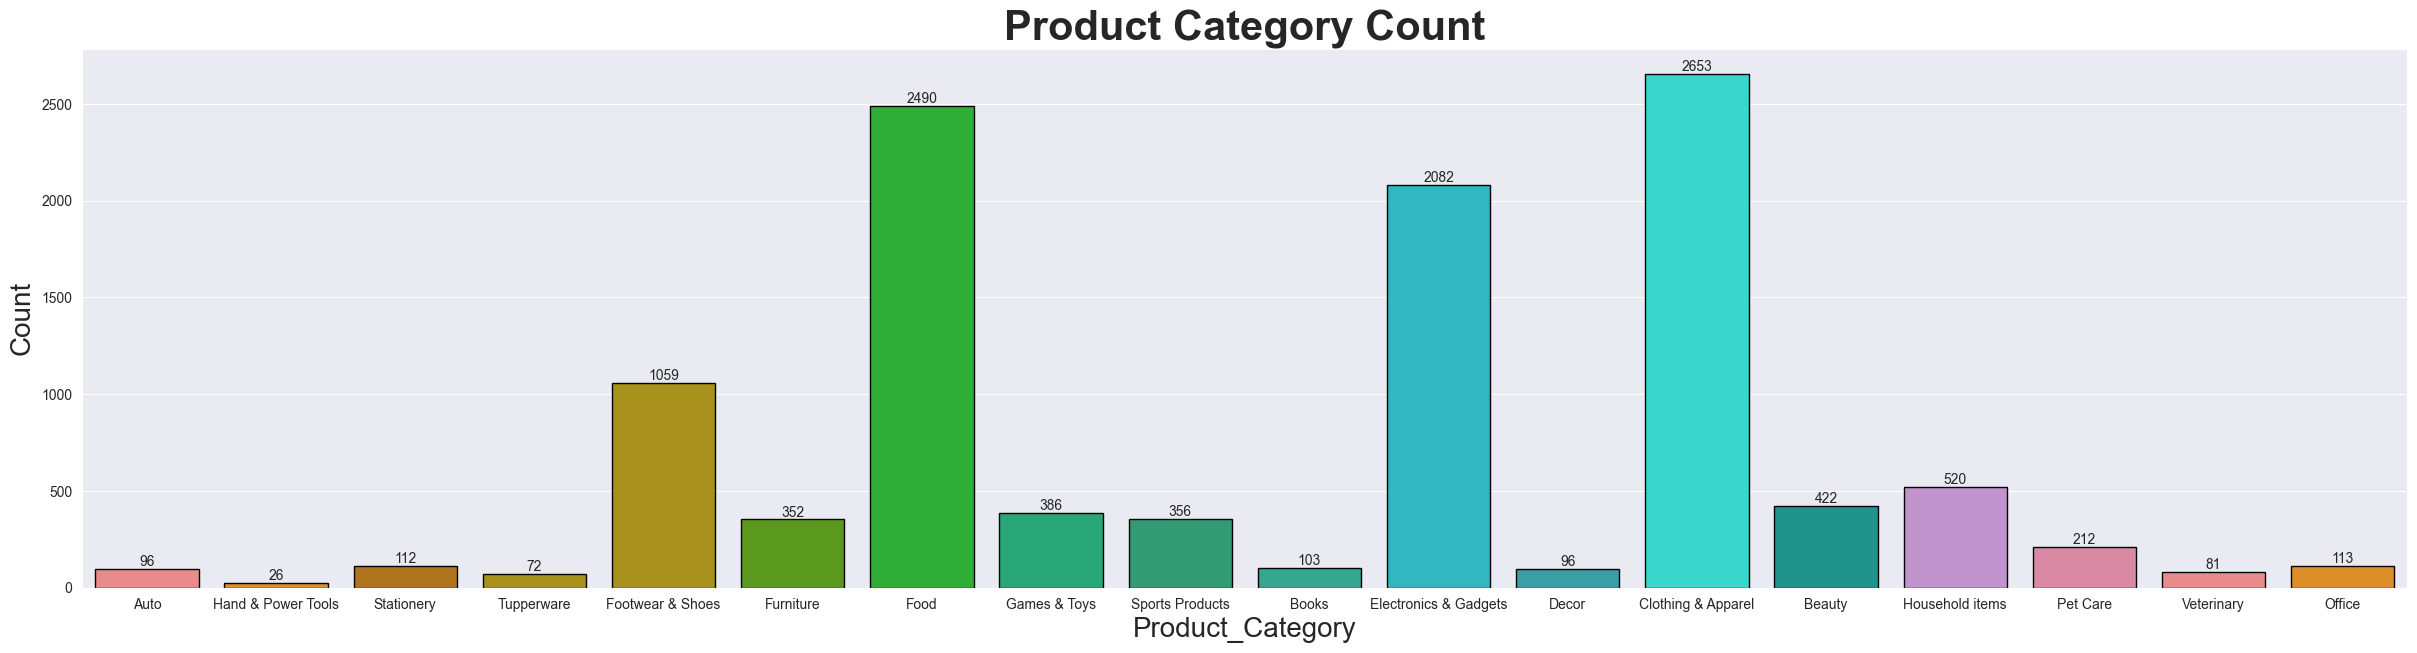

In [43]:
plt.figure(figsize=(30, 7))

colors = ["#f77c7c", "#fa920a", "#c77a06", "#bfa006", "#bfa006", "#5bad09", "#1bc223", "#13bd7e", "#1fad79", "#22ba99", "#18ccd9", "#28aeb8", "#1ff0e5", "#0da69e","#c88bd6", "#e87ba1"]


ax = sns.countplot(data = df, x = "Product_Category", palette = colors, edgecolor="black")
plt.title("Product Category Count", fontsize = 30, fontweight = "bold")

plt.xlabel("Product_Category", fontsize=20)
plt.ylabel("Count", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Top 10 Products Categories by Sales Amount')

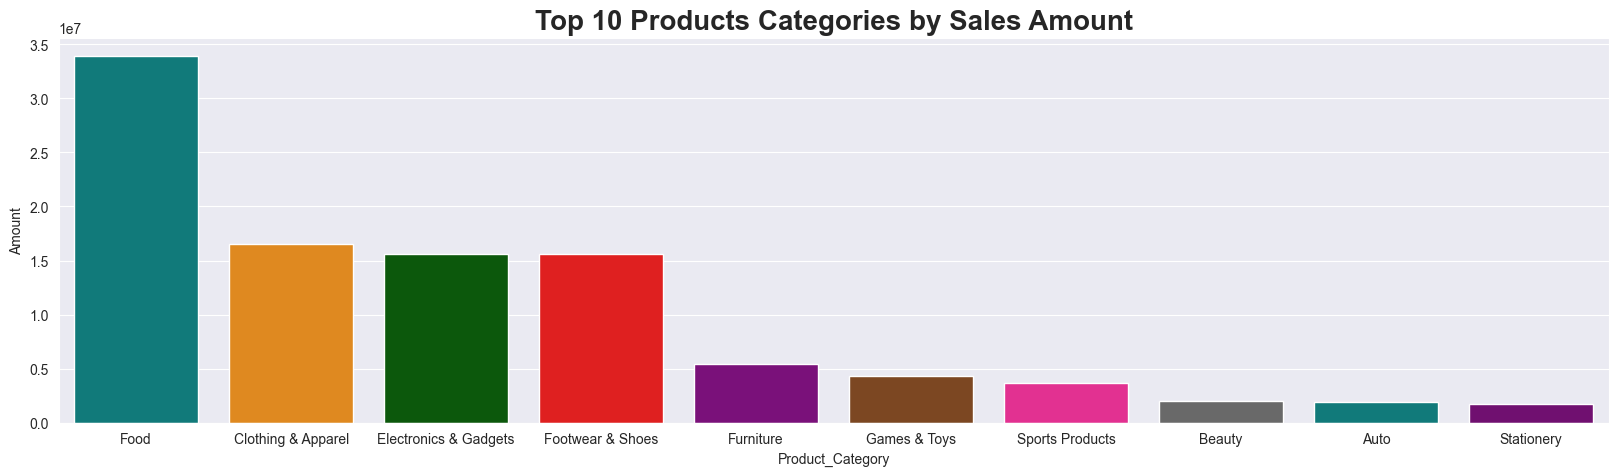

In [31]:
plt.figure(figsize=(20, 5))

colors = ["#008B8B", "#FF8C00", "#006400", "#FF0000", "#8B008B", "#8B4513", "#FF1493", "#696969", "#008B8B", "#800080"]

sales_state = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by = "Amount", ascending=False).head(10)
sns.barplot(data = sales_state, x = "Product_Category", y = "Amount", palette= colors)
plt.title("Top 10 Products Categories by Sales Amount", fontsize = 20, fontweight = "bold")



*From above graphs we can see that most of the sold products are from Food, Footware and Electronics Category*.

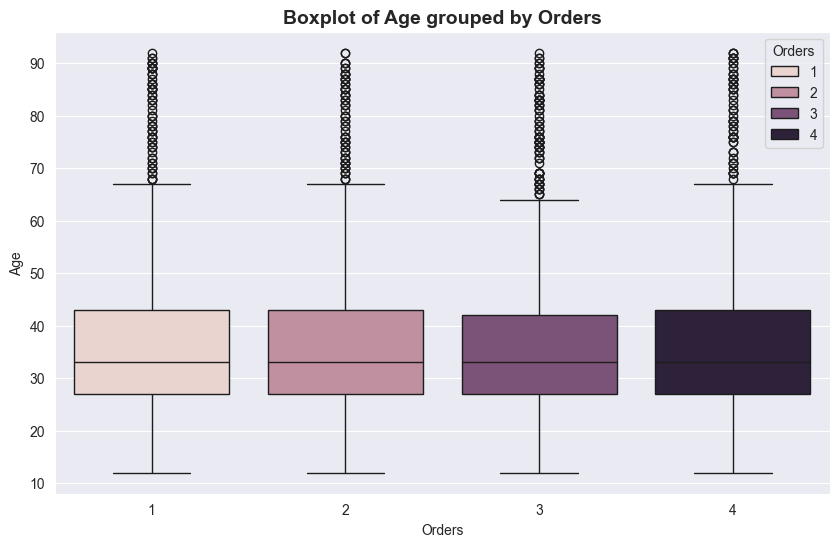

In [48]:
grp = df.groupby('Orders')

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Orders'], y=df['Age'], hue=df['Orders'])
plt.title('Boxplot of Age grouped by Orders',fontsize = 14, fontweight = "bold" )
plt.xlabel('Orders')
plt.ylabel('Age')
plt.show()

Text(0.5, 1.0, 'Top 10 Products by Number of Orders')

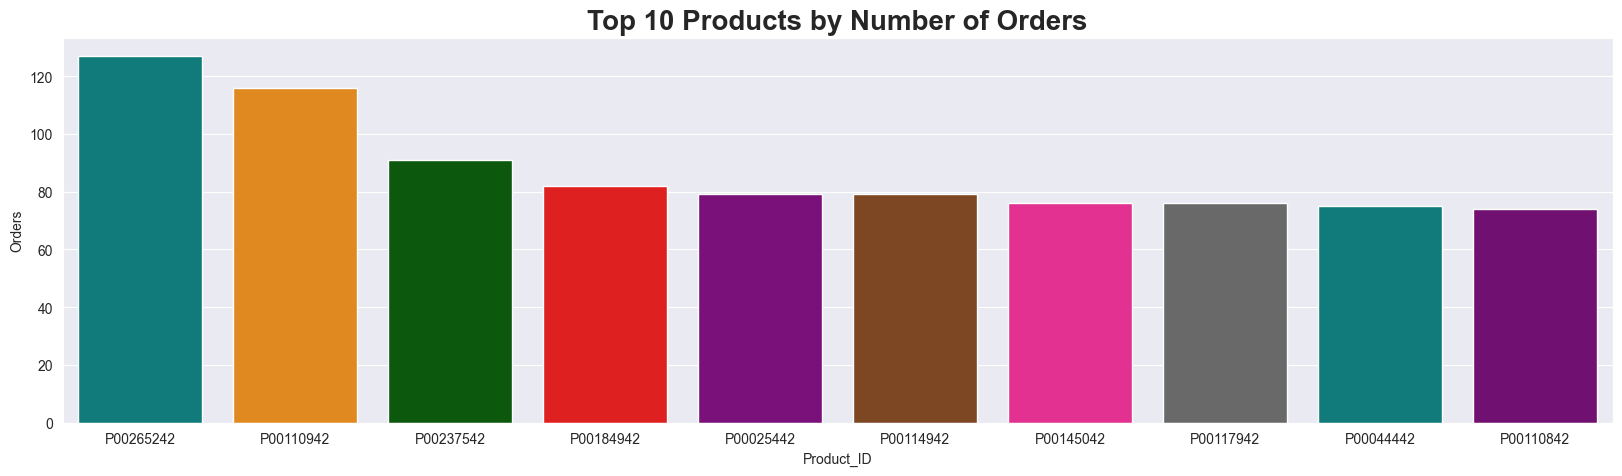

In [32]:
plt.figure(figsize=(20, 5))

colors = ["#008B8B", "#FF8C00", "#006400", "#FF0000", "#8B008B", "#8B4513", "#FF1493", "#696969", "#008B8B", "#800080"]

sales_state = df.groupby(["Product_ID"], as_index=False)["Orders"].sum().sort_values(by = "Orders", ascending=False).head(10)
sns.barplot(data = sales_state, x = "Product_ID", y = "Orders", palette= colors)
plt.title("Top 10 Products by Number of Orders", fontsize = 20, fontweight = "bold")

# Conclusion:

*Married Women age group 26-35 yrs from UP. Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food Clothing and Electronics category*.